In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# unique_df=pd.read_csv('unique.csv')
df=pd.read_csv('preprocessed_book_ratings.csv')

In [5]:
# Check for nulls and preview structure
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70622 entries, 0 to 70621
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Book-Title            70622 non-null  object 
 1   Book-Author           70622 non-null  object 
 2   User-ID               70622 non-null  int64  
 3   ISBN                  70622 non-null  object 
 4   Book-Rating           70622 non-null  int64  
 5   Year-Of-Publication   70622 non-null  int64  
 6   Publisher             70622 non-null  object 
 7   Location              70622 non-null  object 
 8   Age                   52393 non-null  float64
 9   category              67538 non-null  object 
 10  description           70622 non-null  object 
 11  num_words             70622 non-null  int64  
 12  num_chars             70622 non-null  int64  
 13  cleaned_description   70622 non-null  object 
 14  finegrained_topic_no  70622 non-null  float64
 15  finegrained_Theme  

In [6]:
# Count number of ratings per book
ratings_per_book = df.groupby('ISBN')['User-ID'].count().rename('num_ratings').reset_index()

# Merge back into main df
df = df.merge(ratings_per_book, on='ISBN', how='left')

# Define popular books as top 20% by number of ratings
threshold = df['num_ratings'].quantile(0.80)
df['is_popular'] = df['num_ratings'] >= threshold

print(f"Popularity threshold (top 20%): {threshold}")

Popularity threshold (top 20%): 50.0


In [7]:
ratings_per_book.min(), ratings_per_book.max()
#since we initally removed books wit less than 5 ratings

(ISBN           0003300277
 num_ratings             5
 dtype: object,
 ISBN           950491036X
 num_ratings           268
 dtype: object)

In [8]:
# Total number of unique books- THIS IS DONE FOR THE UNIQUE BOOKS!
total_books = df['ISBN'].nunique()
popular_books = df[df['is_popular']]['ISBN'].nunique()

print('Total number of Unique Books:', total_books)
print('Total number of Popular Books (top 20%):', popular_books)
# Count theme frequency overall and in popular books
theme_stats = df.groupby('finegrained_Theme').agg(
    #How many books have that theme
    no_total=('ISBN', 'nunique'),
    #how many books have that theme and are in 'in_popular'
    no_popular=('is_popular', lambda x: df.loc[x.index, 'ISBN'][x].nunique())
)

# Normalize and compute exposure ratio
theme_stats['%_in_all_books'] = theme_stats['no_total'] / total_books
theme_stats['%_in_popular_books'] = theme_stats['no_popular'] / popular_books


theme_stats['%_in_all_books'] = theme_stats['%_in_all_books'] * 100
theme_stats['%_in_popular_books'] = theme_stats['%_in_popular_books'] * 100
theme_stats['%_in_all_books'] = theme_stats['%_in_all_books'].round(2)
theme_stats['%_in_popular_books'] = theme_stats['%_in_popular_books'].round(2)
theme_stats['exposure_ratio'] = theme_stats['%_in_popular_books'] / theme_stats['%_in_all_books']
theme_stats = theme_stats.sort_values('exposure_ratio', ascending=False)


theme_stats.sort_values('%_in_all_books', ascending=False)

Total number of Unique Books: 5229
Total number of Popular Books (top 20%): 176


,no_total,no_popular,%_in_all_books,%_in_popular_books,exposure_ratio
finegrained_Theme,,,,,
Relationships and Family Dynamics,846,31,16.18,17.61,1.088381
Crime Thrillers and Detective Drama,589,20,11.26,11.36,1.008881
American Literature & Classic Prose,478,15,9.14,8.52,0.932166
Gothic Vampire Fiction,382,16,7.31,9.09,1.243502
Murder Mystery,302,8,5.78,4.55,0.787197
Epic Fantasy,300,9,5.74,5.11,0.890244
Spiritual & Mindfulness,281,13,5.37,7.39,1.376164
Humor and Satire,234,6,4.48,3.41,0.761161
Espionage Thriller,202,5,3.86,2.84,0.735751


Relationships and Family Dynamics      16.491376
Crime Thrillers and Detective Drama    11.386902
Gothic Vampire Fiction                 10.797925
American Literature & Classic Prose     8.561212
Spiritual & Mindfulness                 7.628664
Wizarding World                         7.600617
Epic Fantasy                            5.251718
Murder Mystery                          4.831019
Space Adventure                         4.312158
Holiday Classics                        3.828355
Humor and Satire                        2.860749
Galactic Adventures                     2.853737
Espionage Thriller                      2.243725
Arthurian Legends and Magic             1.998317
Romantic Relationships                  1.479456
Historical Time-Travel Romance          1.318188
Family Dynamics and Loss                1.290142
Culinary Arts                           1.213014
Russian Literature                      1.009676
Psychological Thriller                  0.897490
War & Historical Dra

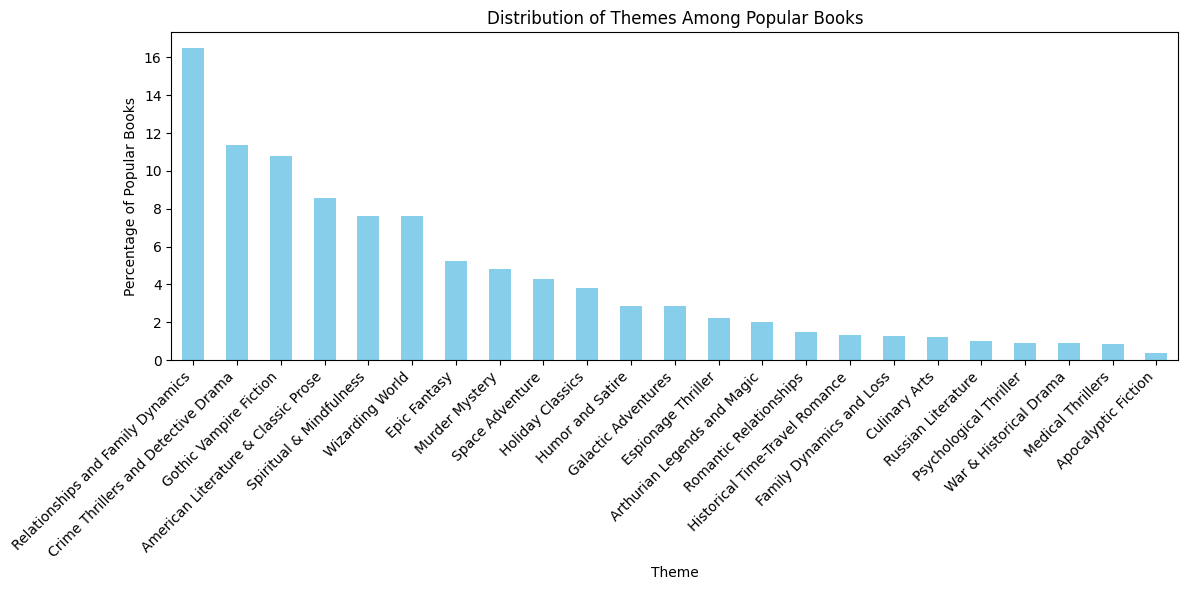

In [9]:
#This check ratio of each theme in the popular books! This is done for the entire Dataset

popular_books = df[df['is_popular']].copy()
theme_popularity = popular_books['finegrained_Theme'].value_counts().sort_values(ascending=False)

theme_popularity_percent = (theme_popularity / theme_popularity.sum()) * 100
print(theme_popularity_percent)

theme_popularity_percent.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title("Distribution of Themes Among Popular Books")
plt.ylabel("Percentage of Popular Books")
plt.xlabel("Theme")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


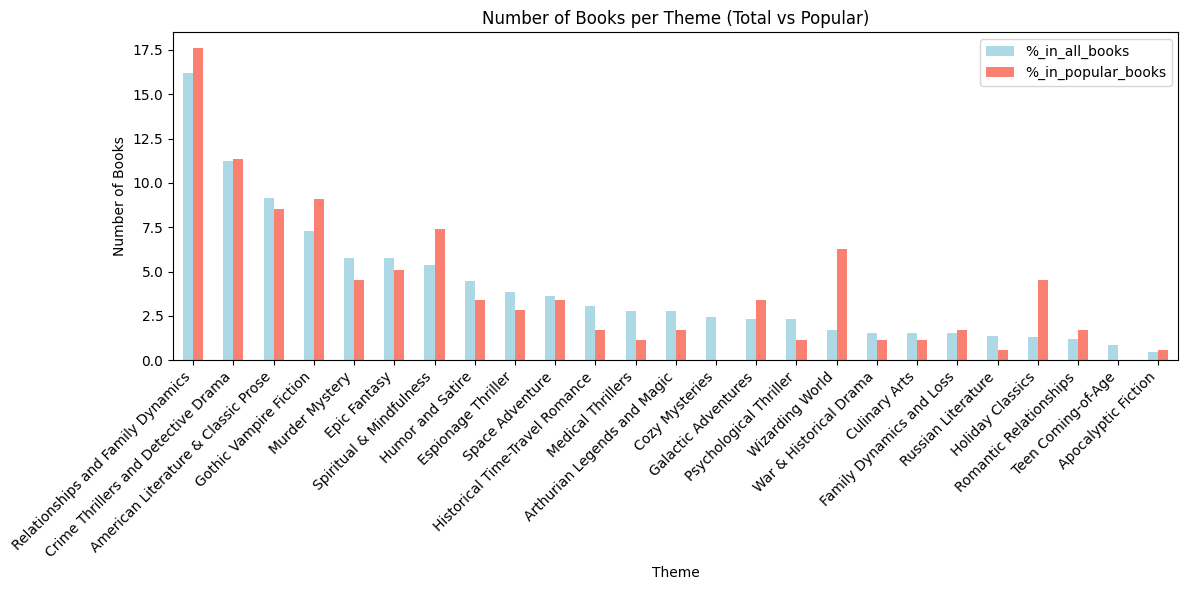

In [10]:
theme_stats[['%_in_all_books', '%_in_popular_books']].sort_values(
    '%_in_all_books', ascending=False
).plot(kind='bar', figsize=(12, 6), color=['lightblue', 'salmon'])
plt.title("Number of Books per Theme (Total vs Popular)")
plt.ylabel("Number of Books")
plt.xlabel("Theme")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [48]:
# We calculated two things: no. of popular items in each book and then calcuated the exposure ratio.
# Next: In the popular books, what was the ratio of each theme?



#problem solved- the first one is 

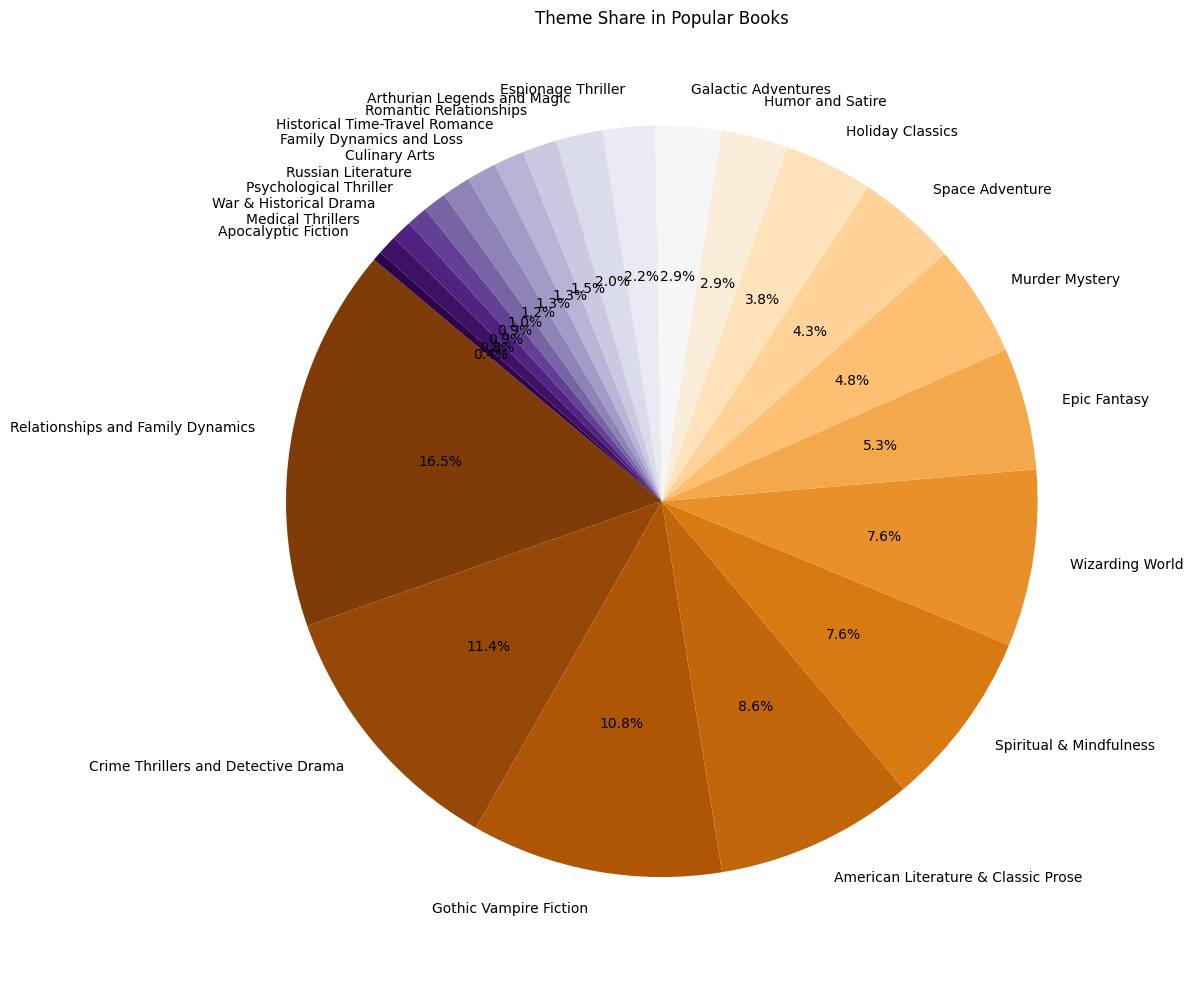

In [11]:
theme_popularity.plot(kind='pie', autopct='%3.1f%%', figsize=(12, 12), startangle=140, colormap='PuOr')
plt.title("Theme Share in Popular Books")
plt.ylabel("")  # Hide y-label
plt.tight_layout()
plt.show()


In [12]:
popular_books['merged_Theme'].value_counts()

Fantasy Literature                  3658
Romance & Relationships             2935
Crime & Detective Fiction           2313
Literary Classics                   1365
Spiritual & Mindfulness             1088
Science Fiction                     1080
Action & Psychological Thrillers     569
Holiday Stories                      546
Humor & Satire                       408
Culinary Arts                        173
War & Historical Drama               127
Name: merged_Theme, dtype: int64